## 1. Linear regression impact on outliers

Question 1

**Plot x, y as a scatter plot and plot your linear regression model in the same scatter plot**

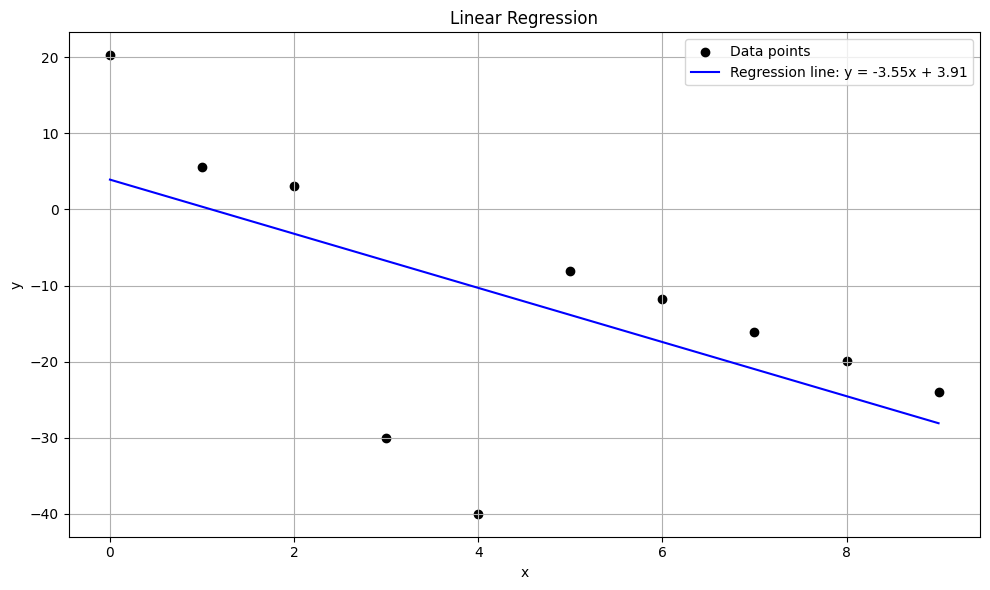

Regression Line Equation: y = -3.55x + 3.91


In [2]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import math

# X_i: independent variables
# Y_i: dependent variables
x_i = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_i = [20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03]

#design matrix
X = np.array([[1, x] for x in x_i])
Y = np.array([[y] for y in y_i])

#w = (X^T * X)^(-1) * X^T * Y
X_T = X.T
w_OLS = np.linalg.inv(X_T @ X) @ X_T @ Y

#coefficients
intercept = w_OLS[0, 0]
slope = w_OLS[1, 0]

#plotting regression line
x_range = np.linspace(min(x_i), max(x_i), 100)
y_predicted = intercept + slope * x_range

plt.figure(figsize=(10, 6))
plt.scatter(x_i, y_i, color='black', label='Data points')
plt.plot(x_range,y_predicted,color='blue',label=f"Regression line: y = {math.trunc(slope*100)/100}x + {math.trunc(intercept*100)/100}"
)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Regression Line Equation: y = {math.trunc(slope*100)/100}x + {math.trunc(intercept*100)/100}")

β = 1.000000:
  Model 1 (y = -4x + 12) loss: 0.4354
  Model 2 (y = -3.55x + 3.91) loss: 0.9728

β = 0.000001:
  Model 1 (y = -4x + 12) loss: 1.0000
  Model 2 (y = -3.55x + 3.91) loss: 1.0000

β = 1000.000000:
  Model 1 (y = -4x + 12) loss: 0.0002
  Model 2 (y = -3.55x + 3.91) loss: 0.0002



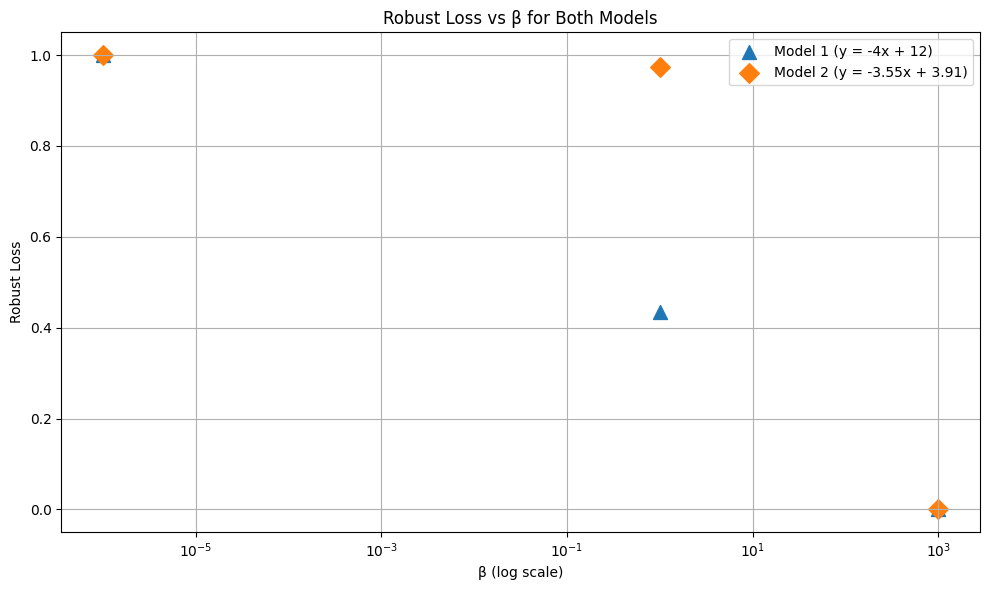

In [8]:
def robust_loss(y_true, y_pred, beta):
    N = len(y_true)
    squared_errors = (y_true - y_pred) ** 2
    loss = np.mean(squared_errors / (squared_errors + beta**2))
    return loss

# Generate predictions for both models
y_1 = -4 * np.array(x_i) + 12  #Model 1
y_2 = -3.55 * np.array(x_i) + 3.91  #Model 2

# Test different beta values
beta_values = [1, 10**(-6), 10**(3)]
results = []

for beta in beta_values:
    loss_1 = robust_loss(y_i, y_1, beta)
    loss_2 = robust_loss(y_i, y_2, beta)
    results.append({
        'beta': beta,
        'loss_1': loss_1,
        'loss_2': loss_2
    })

#table of results
for result in results:
    print(f"β = {result['beta']:.6f}:")
    print(f"  Model 1 (y = -4x + 12) loss: {result['loss_1']:.4f}")
    print(f"  Model 2 (y = -3.55x + 3.91) loss: {result['loss_2']:.4f}")
    print()

# Visualize how the loss changes with beta
plt.figure(figsize=(10, 6))
plt.scatter(beta_values, [r['loss_1'] for r in results], marker='^', s=100, label='Model 1 (y = -4x + 12)')
plt.scatter(beta_values, [r['loss_2'] for r in results], marker='D', s=100, label='Model 2 (y = -3.55x + 3.91)')
plt.xlabel('β (log scale)')
plt.ylabel('Robust Loss')
plt.title('Robust Loss vs β for Both Models')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Ensure x-axis is in log scale
plt.tight_layout()

**Question 5**

* $\beta = 10^{-6}$  
    - With such a tiny β, the loss for both models is almost 1 because the numerator and denominator are nearly same (the $\beta^2$ term is basically zero).  
    - In this case, the loss gets really sensitive to outliers in the dataset.

* $\beta = 1$  
    - When β is 1, the loss gives more balanced values for both models.  
    - It's less crazy about outliers compared to the tiny β, but still sensitive enough to see differences between the models.  
    - So it kinda gives a good balance between being robust and noticing changes in the data.

* $\beta = 10^{3}$  
    - With a huge β, the loss goes really close to zero for both models since the denominator is dominated by the $\beta^2$ term.  
    - This makes it not very sensitive to outliers, but now both models look almost the same, so it’s hard to tell which one is better.


**Conclusion:**  
- Looking at all this, β = 1 seems like the best choice. It gives a good balance and is the most reasonable option.


**Question 6**

* With $\beta = 1$, **Model 1 (*y = -4x + 12*) is the better choice**, because its loss is **0.4354**, while Model 2 (*y = -3.55x + 3.91*) has a loss of **0.9728**.  
    - At this β, the robust loss checks how well each model fits the data, while not letting outliers mess things up.  
    - A smaller robust loss means the model fits the main trend more accurately.  
    - Numerically, Model 1’s loss is much lower than Model 2’s, so it seems to capture the overall pattern better and isn’t thrown off by extreme points—this is exactly what we want from a robust estimator.

**So yeah, Model 1 is the recommended choice:**  
- ***y = -4x + 12***


**Question 7**  

The loss function is:  

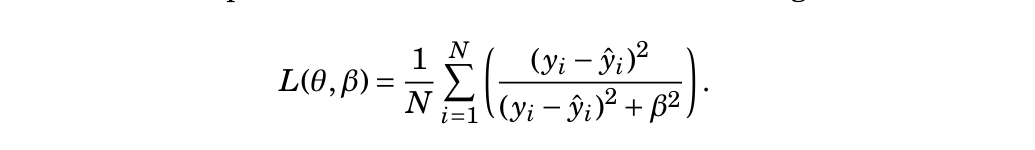

- **When the error** $(y_i - \hat{y}_i)^2$ **is much smaller than** $\beta^2$:  
  The resulting fraction remains small, so these data points add only a minor amount to the total loss — behaving much like a standard squared error.  

- **When the error is very large** (caused by an outlier):  
  The denominator grows to nearly match the numerator, and the fraction approaches 1. This means that even very large errors are capped at a maximum contribution of 1.  

This approach ensures that extreme errors do not dominate the overall loss, reducing the model's sensitivity to outliers. The parameter $\beta$ determines the point where this “capping” behavior begins.


**Question8**

A common alternative is the **Huber loss**. It is defined (for residual $r = y - \hat y$) as:

$$
\ell_{\delta}(r) =
\begin{cases}
\frac{1}{2}r^2 & \text{if } |r| \le \delta,\\[4pt]
\delta\big(|r|-\tfrac{1}{2}\delta\big) & \text{if } |r| > \delta.
\end{cases}
$$

### Why Use Huber Loss

* Huber loss acts **like MSE (squared) for small errors** and **like MAE (linear) for big errors**.  
  This way, big mistakes don’t mess up the model too much, but the function stays smooth and easy to optimize.

* The parameter $\delta$ is kinda like a threshold (similar to $\beta$ in some cases).  
  It decides when the loss changes from “squared” to “linear”, so you can tweak how robust it is.

* There are other robust loss options too, like **Tukey’s biweight** and **Cauchy loss**, but Huber is usually picked because it’s simple and works well in most cases.


## 2. Loss Function

- **Application 1:** The dependent variable is continuous.

- **Application 2:** The dependent variable is discrete and binary (only takes the values 0 or 1, i.e., \( y \in \{0,1\} \)).

### Mean Squared Error (MSE):

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

### Binary Cross Entropy (BCE):

$$
\text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i) \right]
$$



Table: MSE and BCE loss values for different predictions when y=1


,y_true,y_pred,MSE,BCE
0,1,0.005,0.990025,5.298317
1,1,0.010,0.980100,4.605170
2,1,0.050,0.902500,2.995732
3,1,0.100,0.810000,2.302585
4,1,0.200,0.640000,1.609438
5,1,0.300,0.490000,1.203973
6,1,0.400,0.360000,0.916291
7,1,0.500,0.250000,0.693147
8,1,0.600,0.160000,0.510826
9,1,0.700,0.090000,0.356675


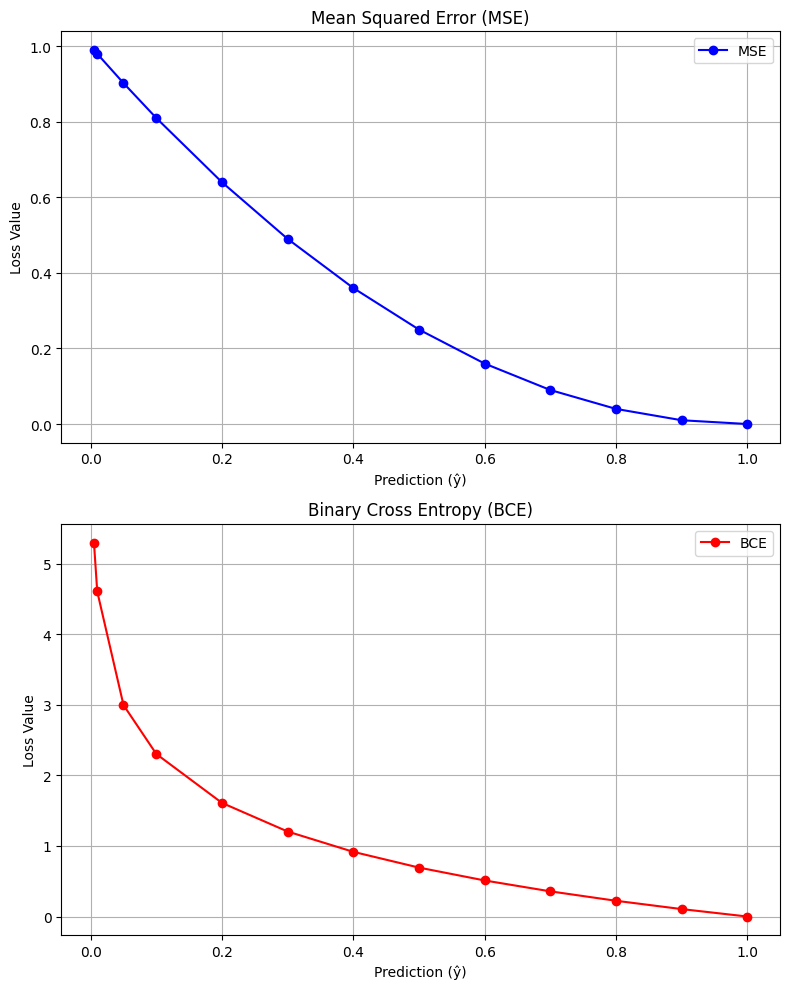

In [11]:
import math
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display  #to show DataFrame as table in Colab

# true labels
y_true = [1] * 11  # 11 samples

#predictions
y_pred = [0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# FunctionMean Squared Error
def calculate_mse(y_true, y_pred):
    return sum((yt - y_pred) ** 2 for yt in y_true) / len(y_true)

# Function Binary Cross Entropy
def calculate_bce(y_true, y_pred):
    epsilon = 1e-15
    y_pred = max(min(y_pred, 1 - epsilon), epsilon)
    return -sum(yt * math.log(y_pred) for yt in y_true) / len(y_true)

# Calculate losses
mse_values = [calculate_mse(y_true, pred) for pred in y_pred]
bce_values = [calculate_bce(y_true, pred) for pred in y_pred]

#DataFrame for the table
df = pd.DataFrame({
    "y_true": [1]*len(y_pred),
    "y_pred": y_pred,
    "MSE": mse_values,
    "BCE": bce_values
})

# Display the table
print("Table: MSE and BCE loss values for different predictions when y=1")
display(df.style.format({"y_pred": "{:.3f}", "MSE": "{:.6f}", "BCE": "{:.6f}"}))

# Plotting both loss functions vertically
plt.figure(figsize=(8, 10))

# Plot MSE
plt.subplot(2, 1, 1)
plt.plot(y_pred, mse_values, 'b-o', label='MSE')
plt.xlabel('Prediction (ŷ)')
plt.ylabel('Loss Value')
plt.title('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()

# Plot BCE
plt.subplot(2, 1, 2)
plt.plot(y_pred, bce_values, 'r-o', label='BCE')
plt.xlabel('Prediction (ŷ)')
plt.ylabel('Loss Value')
plt.title('Binary Cross Entropy (BCE)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### Application 1: Linear Regression with Continuous Dependent Variable
**Selected: Mean Squared Error (MSE)**

**Why MSE is used:**

1. MSE works well for continuous variables because:
   - It looks at the squared difference between what we predicted and the actual value.
   - Big errors are punished more (because we square them).
   - It handles positive and negative errors easily.
   - Its gradient is proportional to the error, so optimization is kinda easy.

2. BCE is not good here because:
   - BCE expects probabilities between 0 and 1.
   - It's meant for yes/no type problems, not continuous numbers.
   - Using BCE with continuous numbers can be weird or cause errors (like log of negative numbers).



### Application 2: Logistic Regression with Binary Dependent Variable
**Selected: Binary Cross Entropy (BCE)**

**Why BCE is used:**

1. BCE is great for yes/no problems because:
   - It's made for probabilities between 0 and 1.
   - It compares predicted probabilities with actual outcomes.
   - Gives bigger gradients if predictions are super confident but wrong.
   - Fits naturally with logistic function output.

2. MSE is kinda not ideal here because:
   - It ignores the probability nature of binary problems.
   - Can make learning slower.
   - Gradients can be tiny when predictions are far from targets.


## 3. Data pre-processing

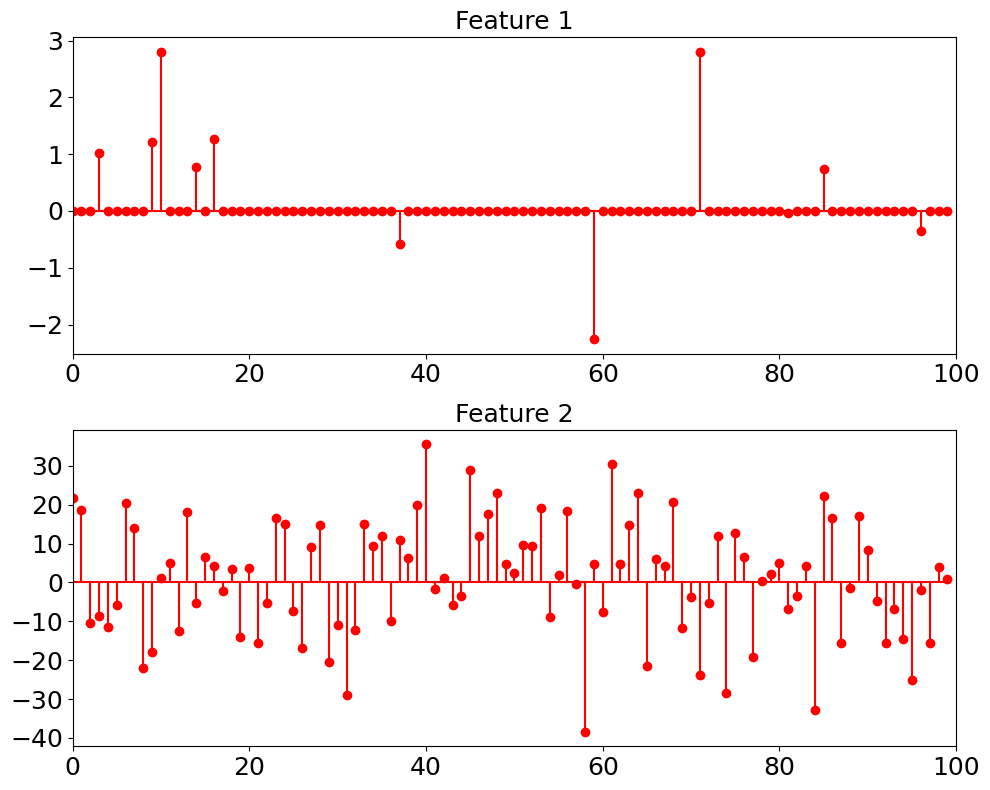

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def gen_sig(L, N):
    sig = np.zeros(L)
    idx = np.random.choice(L, N, replace=False)
    sig[idx] = 10 * np.random.randn(N)
    return sig

# Params
L = 100           # signal length
N = 10            # number of non-zero values
idx_no = 220332   # your index number

# Sparse signal
sig = gen_sig(L, N)

# based on index
sig[10] = (idx_no % 10) * 2 + 10
if idx_no % 10 == 0:
    sig[10] = np.random.randn(1) + 30

# Scale signal
sig = sig / 5

# Random noise
noise = np.random.normal(0, 15, L)

# Plot
plt.figure(figsize=(10, 8))

# Feature 1
plt.subplot(2, 1, 1)
plt.xlim(0, L)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(sig, linefmt='r-', markerfmt='ro', basefmt='r-')

# Feature 2
plt.subplot(2, 1, 2)
plt.xlim(0, L)
plt.title("Feature 2", fontsize=18)
plt.stem(noise, linefmt='r-', markerfmt='ro', basefmt='r-')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()


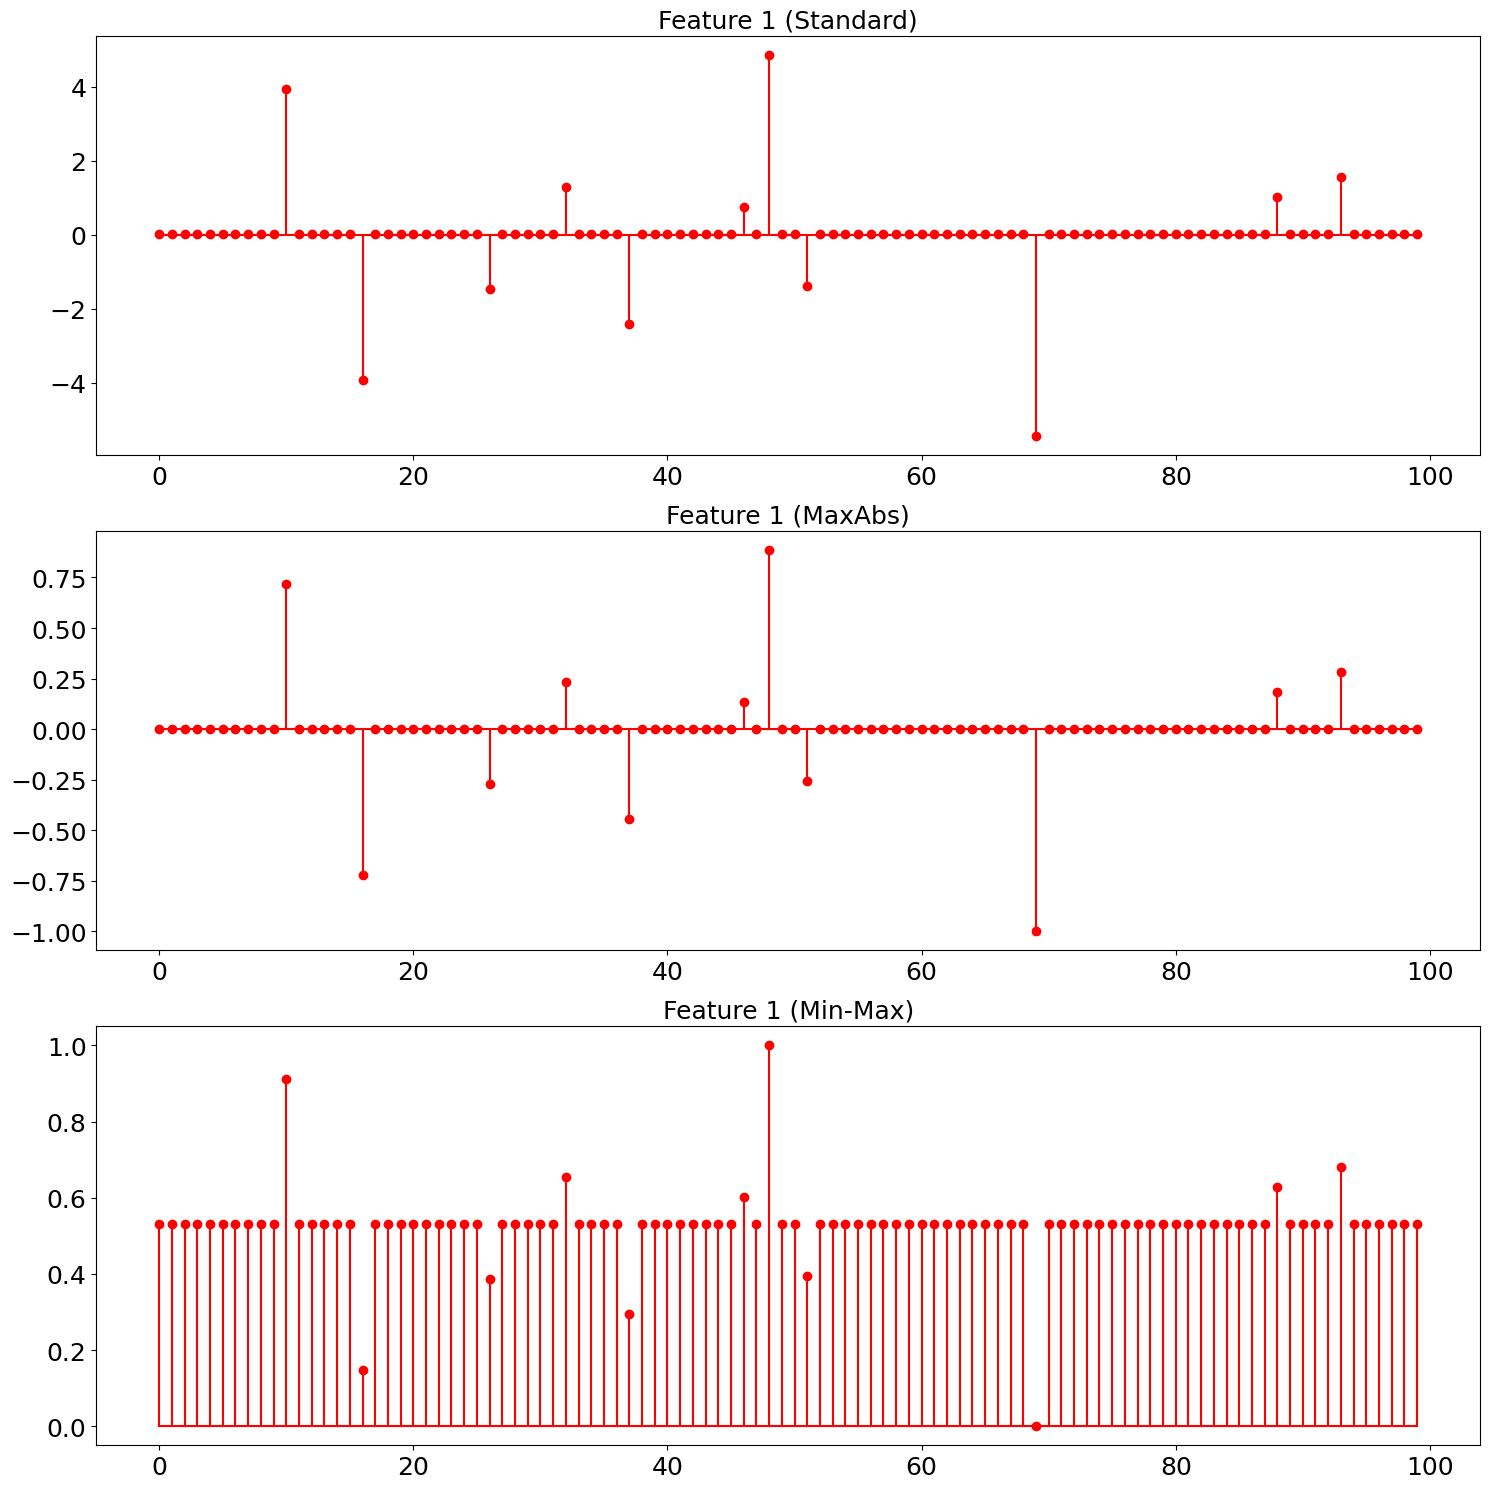

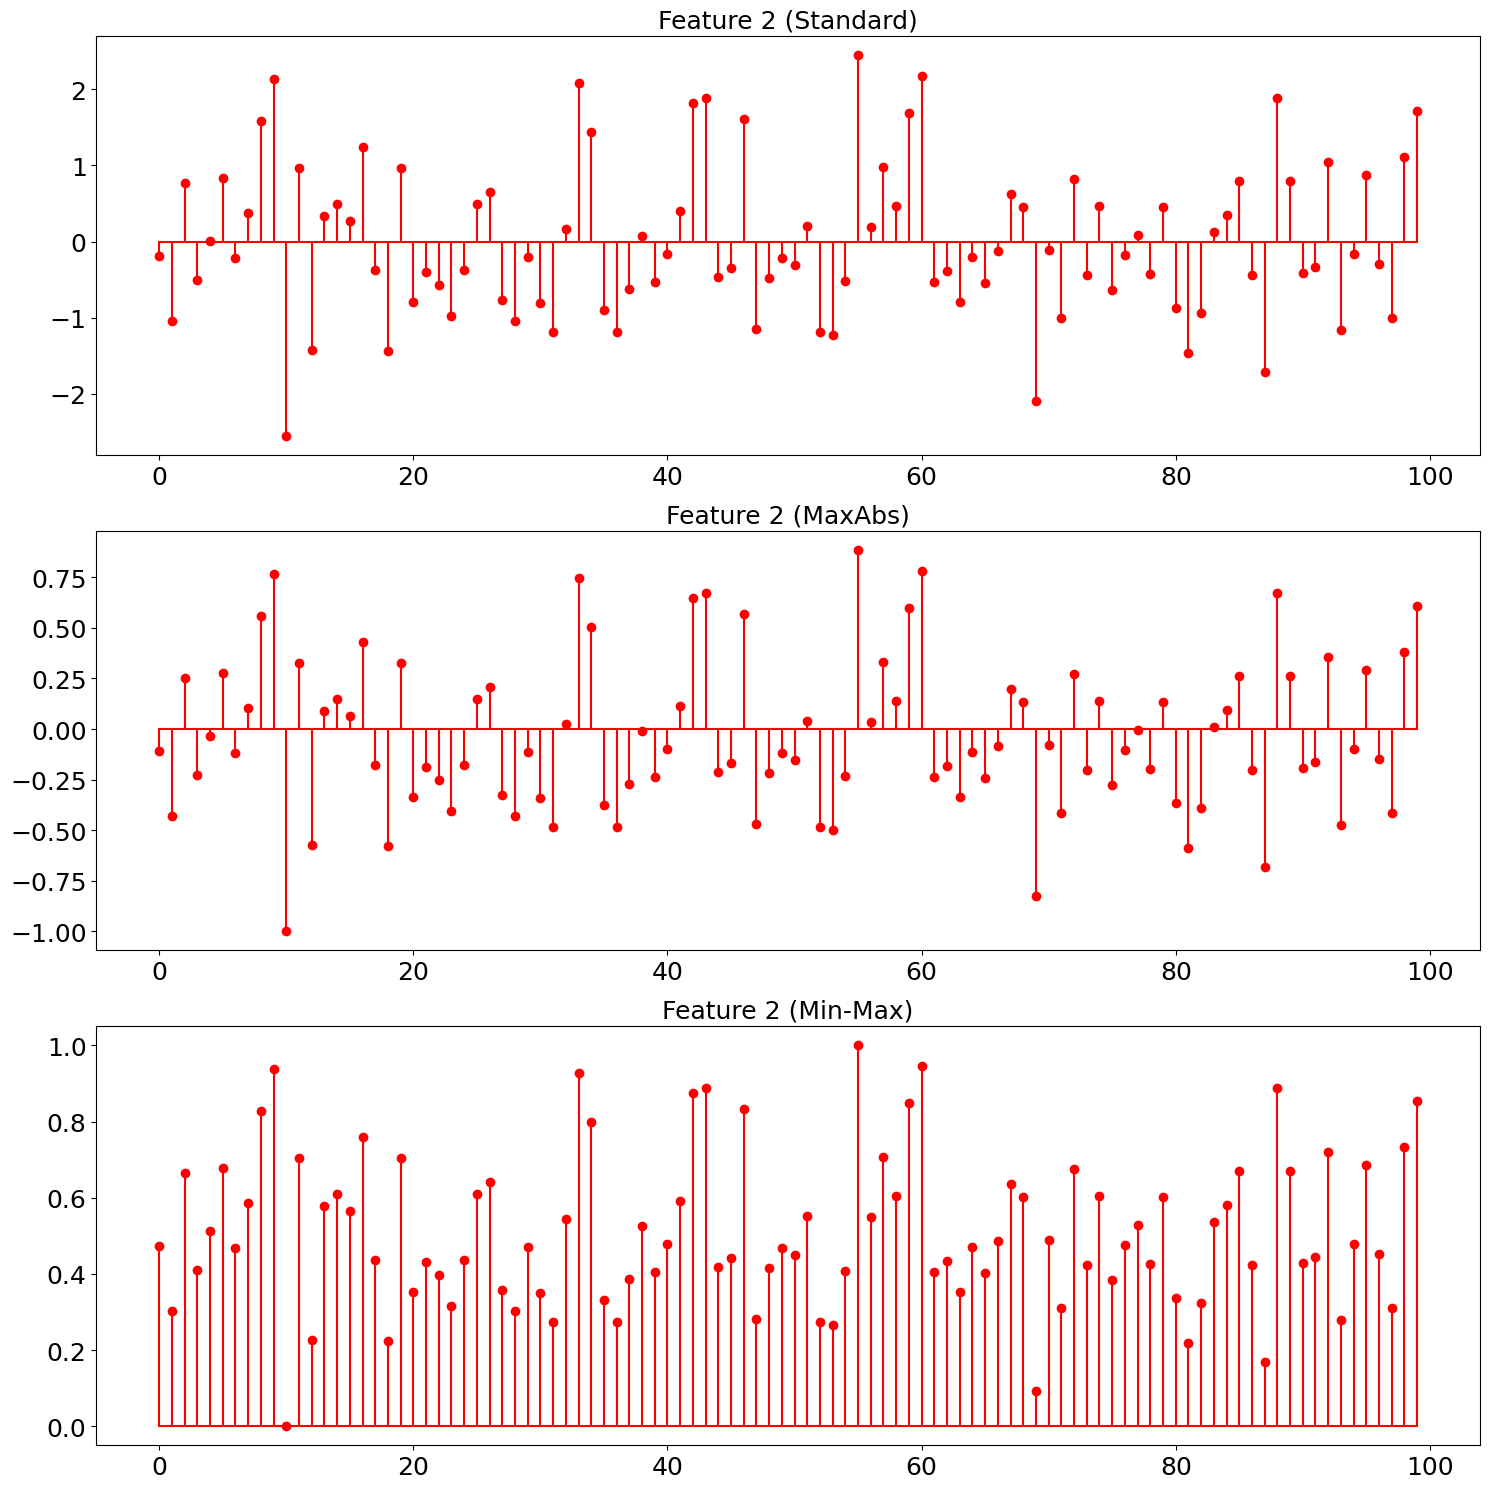

In [15]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Scalers
sc_std = StandardScaler()
sc_max = MaxAbsScaler()
sc_min = MinMaxScaler()

# Scale Feature 1
f1_std = sc_std.fit_transform(sig.reshape(-1, 1)).ravel()
f1_max = sc_max.fit_transform(sig.reshape(-1, 1)).ravel()
f1_min = sc_min.fit_transform(sig.reshape(-1, 1)).ravel()

# Scale Feature 2
f2_std = sc_std.fit_transform(noise.reshape(-1, 1)).ravel()
f2_max = sc_max.fit_transform(noise.reshape(-1, 1)).ravel()
f2_min = sc_min.fit_transform(noise.reshape(-1, 1)).ravel()

# Plot Feature 1
plt.figure(figsize=(15, 15))

plt.subplot(3,1,1)
plt.title("Feature 1 (Standard)", fontsize=18)
plt.stem(f1_std, linefmt='r-', markerfmt='ro', basefmt='r-')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(3,1,2)
plt.title("Feature 1 (MaxAbs)", fontsize=18)
plt.stem(f1_max, linefmt='r-', markerfmt='ro', basefmt='r-')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(3,1,3)
plt.title("Feature 1 (Min-Max)", fontsize=18)
plt.stem(f1_min, linefmt='r-', markerfmt='ro', basefmt='r-')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()

# Plot Feature 2
plt.figure(figsize=(15, 15))

plt.subplot(3,1,1)
plt.title("Feature 2 (Standard)", fontsize=18)
plt.stem(f2_std, linefmt='r-', markerfmt='ro', basefmt='r-')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(3,1,2)
plt.title("Feature 2 (MaxAbs)", fontsize=18)
plt.stem(f2_max, linefmt='r-', markerfmt='ro', basefmt='r-')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.subplot(3,1,3)
plt.title("Feature 2 (Min-Max)", fontsize=18)
plt.stem(f2_min, linefmt='r-', markerfmt='ro', basefmt='r-')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()


### Feature Analysis

**Feature 1 (Sparse Signal):**

- Mostly zeros (sparse)
- Only a few non-zero values
- Gotta keep the sparsity intact
- Has both positive and negative numbers

**Feature 2 (Random Noise):**

- Around zero, normally distributed
- Positive and negative values too
- Variance pretty consistent
- No need to keep zeros like sparse signal

### Recommended Scaling

**Feature 1: MaxAbs Scaling**

Why:
- Keeps zeros as zeros (sparsity preserved)
- Sign of values stays the same
- Scales to [-1, 1] without moving the mean
- Doesn’t mess up the sparse structure like standard scaling
- Better than min-max since that would shift zeros

**Feature 2: Standard Scaling**

Why:
- Works well for normally distributed data
- Centers around zero (keeps shape of distribution)
- Makes variance uniform (σ = 1)
- Handles outliers better than min-max
- Good when mean and variance are important
